In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

datapath = "/Users/puyuange/Documents/uni stuff/Non-Trivial/NTFproject-Python/results/"

df = pd.read_csv(datapath+"response-time-results.csv", sep=',')


In [47]:
df["Inverted Log Time"] = df["Time"].apply(lambda x: 1-np.emath.logn(700, x))
df["stratscale"] = df["Strategy"].apply(lambda x: 50*(x+1))
df.head(30)

,Response Time,Strategy,Time,Epidemic Spread Index,Disruption Index,Inverted Log Time,stratscale
0,0,0,492,0.889,0.000,0.053823,50
1,0,1,517,0.889,0.001,0.046258,100
2,0,2,523,0.885,0.002,0.044496,150
3,0,3,665,0.771,0.024,0.007830,200
4,0,4,622,0.037,0.036,0.018034,250
5,0,5,559,0.023,0.073,0.034335,300
6,0,6,559,0.023,1.000,0.034335,350
7,3,1,501,0.888,0.001,0.051056,100
8,3,2,515,0.885,0.002,0.046849,150
9,3,3,661,0.771,0.024,0.008751,200


/var/folders/mp/gtpcl1p10z98ksbcwxz0n_pr0000gn/T/ipykernel_4292/996418401.py:39: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist=11


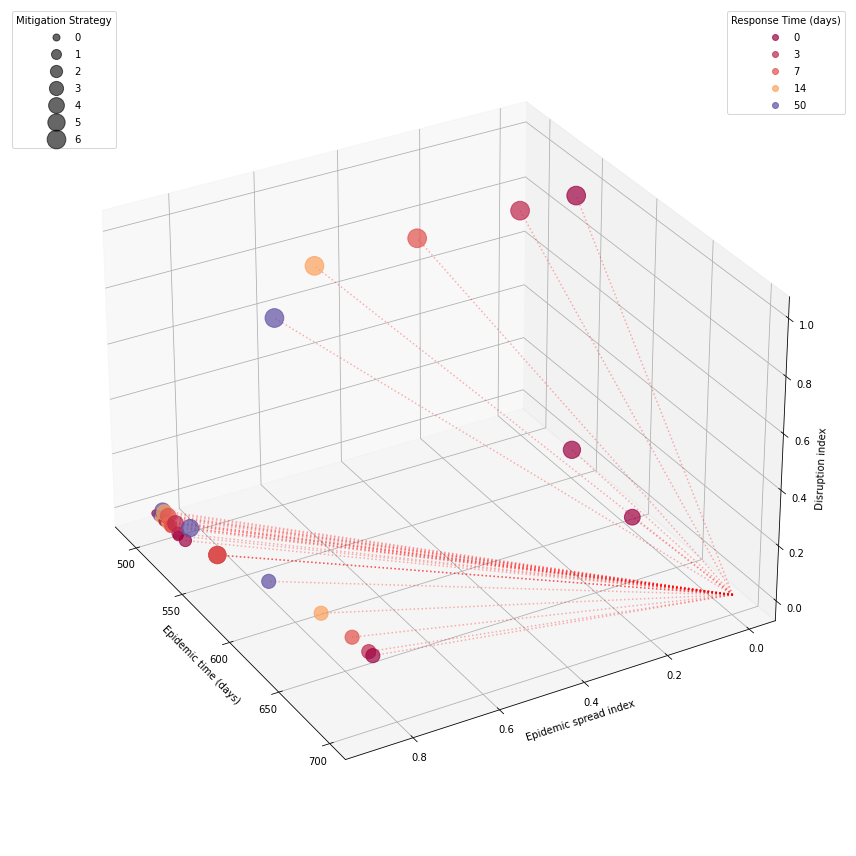

In [68]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')


#for i in range(len(df)):
#    if df["Strategy"].iloc[i] == 0:
#        style = '*'
#    elif df["Strategy"].iloc[i] == 1:
#        style = 'p'
#    elif df["Strategy"].iloc[i] == 2:
#        style = 's'
#    elif df["Strategy"].iloc[i] == 3:
#        style = 'd'
#    elif df["Strategy"].iloc[i] == 4:
#        style = 'x'
#    elif df["Strategy"].iloc[i] == 5:
#        style = 'v'
#    else:
#        style = 'o'


scatter = ax.scatter(df["Time"], df["Epidemic Spread Index"], df["Disruption Index"], c=df["Response Time"], s=df["stratscale"], cmap="Spectral", alpha=0.7)
for i in range(len(df)):
    ax.plot([700, df['Time'].iloc[i]], [0, df['Epidemic Spread Index'].iloc[i]], [0, df['Disruption Index'].iloc[i]], "r:", alpha=0.3)

plt.gca().invert_xaxis()

legend1 = ax.legend(*scatter.legend_elements(), loc="upper right", title="Response Time (days)")
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
kw = dict(prop="sizes", func=lambda s: (s/50)-1, alpha=0.6)
legend2 = ax.legend(*scatter.legend_elements(**kw), loc="upper left", title="Mitigation Strategy")
ax.add_artist(legend1)
ax.set_xlabel("Epidemic time (days)")
ax.set_ylabel("Epidemic spread index")
ax.set_zlabel("Disruption index")

plt.tight_layout()
ax.view_init(elev=30, azim=150)
ax.dist=11